In [2]:
topics = [
    'wmdp_bio',
    'mmlu_high_school_us_history',
    'mmlu_high_school_geography',
    'mmlu_human_aging'
    ]
topics = ",".join(topics)
topics

'wmdp_bio,mmlu_high_school_us_history,mmlu_high_school_geography,mmlu_human_aging'

In [8]:
# import subprocess
# csv_file_path = '/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7/top_20_coef_-50_method_none_steer.csv'
# output_path = "/home/cs29824/andre/sae_jailbreak_unlearning/results/"
# command = f"""lm_eval \
#             --model sae_steered_beta \
#             --model_args csv_path={csv_file_path},base_name=google/gemma-2-2b \
#             --tasks {topics} \
#             --batch_size auto \
#             --output_path {output_path} \
#             --device cuda:1 \
#                 """
# result = subprocess.run(command, capture_output=False, text=True, shell=True)

In [ ]:
import os
import subprocess
from tqdm import tqdm
import torch 
import time

device = torch.device('cuda:1')
# Specify the folder containing CSV files
folder_path = "/home/cs29824/andre/sae_jailbreak_unlearning/steer_dfs_final_7"
output_path = "/home/cs29824/andre/sae_jailbreak_unlearning/results/google__gemma-2b_steer_eval_7"
os.makedirs(output_path, exist_ok=True)

currents = [e.split("__")[-1] for e in os.listdir(output_path)]


# Loop through each file in the folder
for filename in tqdm(os.listdir(folder_path)):
    if filename.split('/')[-1] in currents:
        print(f'{filename} is already tested!')
        continue
    print(filename)
    # Check if the file is a CSV file
    if filename.endswith(".csv"):
        # Construct the full path to the CSV file
        csv_file_path = os.path.join(folder_path, filename)
        
        # Construct the command with the specific CSV file
        command = f"""lm_eval \
                    --model sae_steered_beta \
                    --model_args csv_path={csv_file_path},base_name='google/gemma-2-2b' \
                    --tasks {topics} \
                    --batch_size auto \
                    --output_path {output_path} \
                    --device cuda:1 \
"""
        # Run the command and capture output
        # Run the command in the shell
        result = subprocess.run(command, capture_output=True, text=True, shell=True)
        

        # Print the result for each CSV file
        print(f"Results for {filename}:")
        print(f"Stdout: {result.stdout}")
        print(f"Stderr: {result.stderr}")
        print(f"Return code: {result.returncode}")
        print("-" * 50)

        del result
        with torch.cuda.device(device):
            torch.cuda.empty_cache()
            print("GPU memory cleared on cuda:1.")
        time.sleep(5)

  0%|          | 0/48 [00:00<?, ?it/s]

top_20_coef_-100_method_proportional_steer.csv


In [1]:
  # Wait a moment for the cache to clear
time.sleep(5)
with torch.cuda.device(device):
    torch.cuda.empty_cache()
    print("GPU memory cleared on cuda:1.")

NameError: name 'time' is not defined

# Visualize

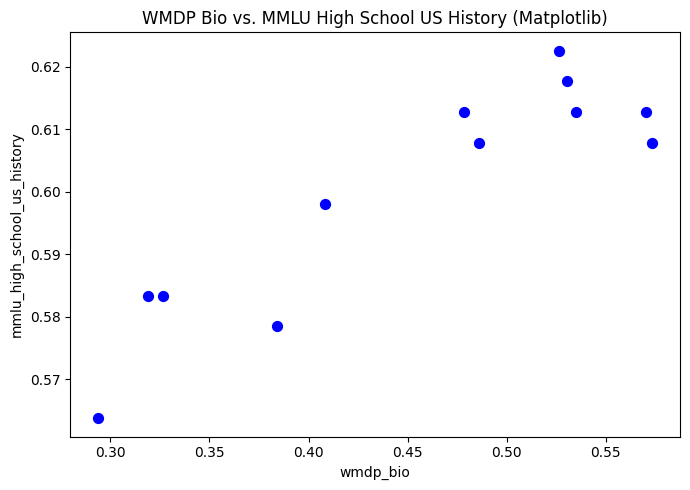

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors  # For interactive hover annotations

# Path to the main folder containing "subfolders" that end with .csv
main_folder = "/home/cs29824/andre/sae_jailbreak_unlearning/results/google__gemma-2b_steer_eval_7"

data_list = []

# 1. Gather data from subfolders that end with ".csv" and parse JSON files
for item in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, item)
    
    # Check if this is a directory and ends with '.csv'
    if os.path.isdir(subfolder_path) and item.endswith(".csv"):
        # Inside this subfolder, look for JSON files
        for fname in os.listdir(subfolder_path):
            if fname.endswith(".json"):
                json_path = os.path.join(subfolder_path, fname)

                # Load the JSON
                with open(json_path, "r") as f:
                    data = json.load(f)

                # Extract the needed values
                try:
                    x_val = data["results"]["wmdp_bio"]["acc,none"]
                    y_val = data["results"]["mmlu_high_school_us_history"]["acc,none"]
                except KeyError:
                    print(f"Skipping {json_path} - required keys not found.")
                    continue

                data_list.append({
                    "subfolder": item,  # e.g., "<something>.csv"
                    "wmdp_bio": x_val,
                    "mmlu_high_school_us_history": y_val
                })

# 2. Convert collected data to a DataFrame
df = pd.DataFrame(data_list)

# 3. Create a Matplotlib scatter plot
fig, ax = plt.subplots(figsize=(7, 5))
scatter = ax.scatter(
    df["wmdp_bio"], 
    df["mmlu_high_school_us_history"], 
    s=50, 
    c="blue"
)

ax.set_xlabel("wmdp_bio")
ax.set_ylabel("mmlu_high_school_us_history")
ax.set_title("WMDP Bio vs. MMLU High School US History (Matplotlib)")

# 4. Add interactive hover using mplcursors
cursor = mplcursors.cursor(scatter, hover=True)

@cursor.connect("add")
def on_add(sel):
    # sel.index gives the index of the point in the scatter
    idx = sel.index
    # Retrieve the subfolder name from our DataFrame
    folder_name = df["subfolder"].iloc[idx]
    # Customize the annotation text
    sel.annotation.set_text(folder_name)

# 5. Show the plot
plt.tight_layout()
plt.show()
